In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# change to working tensorflow directory on the drive
%cd '/content/gdrive/MyDrive/word_data'


Mounted at /content/gdrive


In [ ]:
!pip install spafe

     |████████████████████████████████| 81kB 3.4MB/s 


## Importing Libraries

In [ ]:
import sys,os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from spafe.features.lpc import lpc, lpcc
from spafe.features.rplp import rplp, plp
from sklearn.preprocessing import LabelEncoder


%matplotlib inline

In [ ]:
path = "/content/sample-000003.mp3"

samples, sample_rate=librosa.load(path ,sr=16000)
ipd.Audio(path)

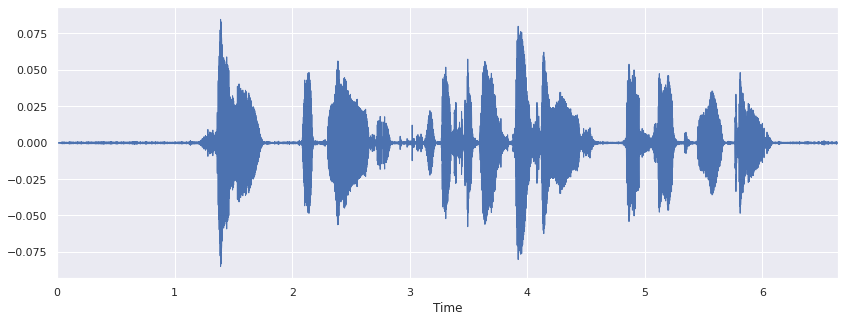

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sample_rate)
ax.label_outer()


## Feature Extraction

01: MFCC

In [ ]:

def mfcc_feature(audio):
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
 
    return mfcc   # it returns a np.array with size (40,'n') where n is the number of audio frames.

[Text(0.5, 1.0, 'MFCC')]

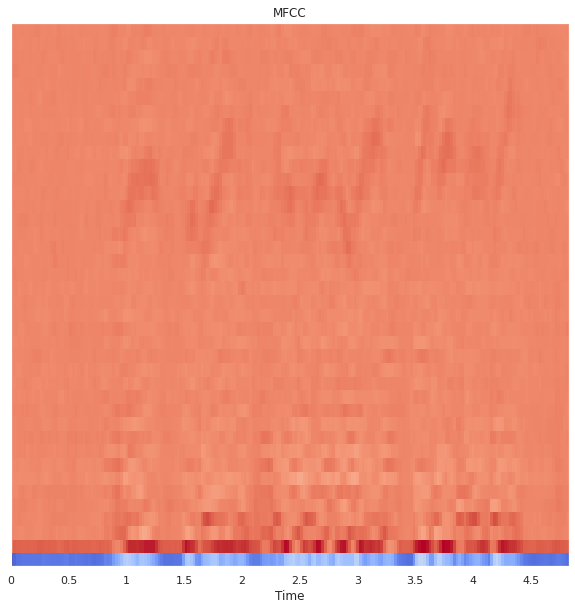

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
img = librosa.display.specshow(data, x_axis='time', ax=ax)
ax.set(title='MFCC')
ax.label_outer()


02: Root-mean-square (RMS) value for each frame

In [ ]:
def RMS_feature(audio):
    rms = librosa.feature.rms(y=audio)
 
    return rms   # it returns a np.array with size (1,'n') where n is the number of audio frames.

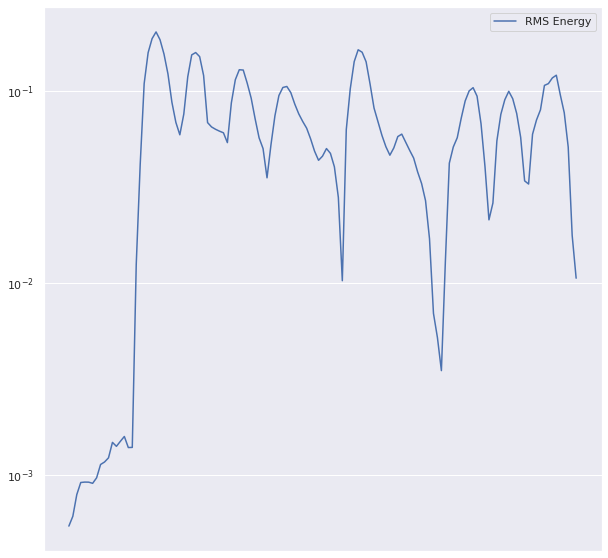

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

times = librosa.times_like(data)
ax.semilogy(times, data[0], label='RMS Energy')
ax.set(xticks=[])
ax.legend()
ax.label_outer()

03: Chroma variant “Chroma Energy Normalized” (CENS)

In [ ]:
sample_rate = 16000
def CEN_feature(audio):
    cen = librosa.feature.chroma_cens(y=audio, sr=sample_rate)
 
 
    return cen   # it returns a np.array with size (12,'n') where n is the number of audio frames.

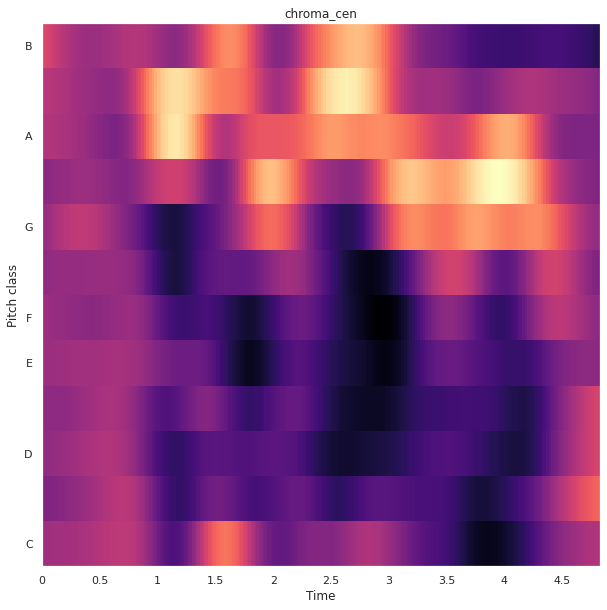

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

img = librosa.display.specshow(data, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='chroma_cen')

ax.label_outer()

04:  Mel-scaled spectrogram

In [ ]:
sample_rate = 16000
def melspectrogram_feature(audio):
    melspectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_fft=2048)
 
    return melspectrogram   # it returns a np.array with size (128,'n') where n is the number of audio frames.

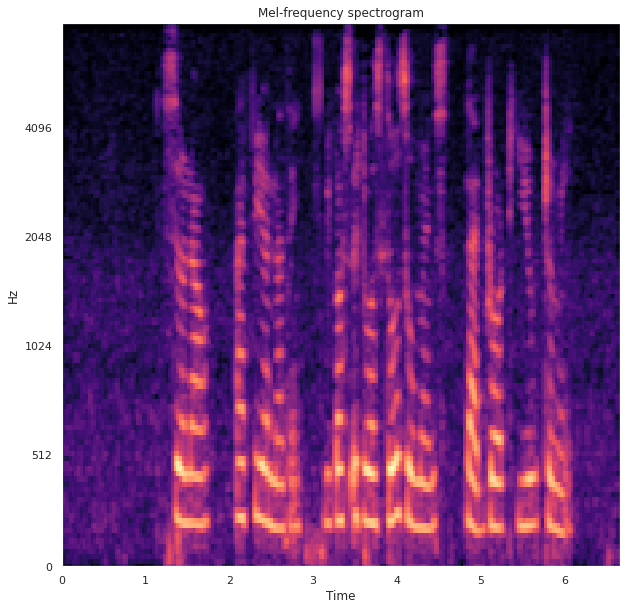

In [ ]:

fig, ax = plt.subplots(figsize=(10,10))

S_dB = librosa.power_to_db(data, ref=np.max)

img = librosa.display.specshow(S_dB, x_axis='time',

                         y_axis='mel', sr=16000,

                         fmax=8000, ax=ax)


ax.set(title='Mel-frequency spectrogram')
ax.label_outer()

05:  Spectral Centroid

In [ ]:
sample_rate = 16000
def spectral_centroid_feature(audio):
    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sample_rate, n_fft=2048)
 
    return spectral_centroid   # it returns a np.array with size (1,'n') where n is the number of audio frames.

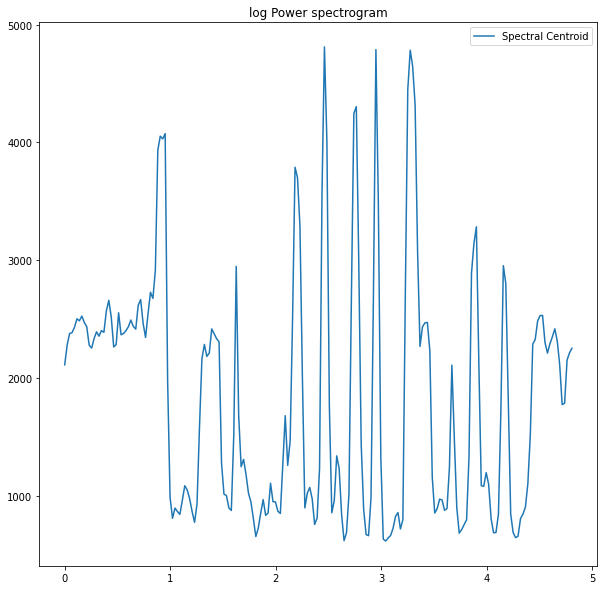

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

times = librosa.times_like(data)
ax.plot(times, data.T, label='Spectral Centroid')

ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')
ax.label_outer()

06: Tonal Centroid features (tonnetz)

In [ ]:
sample_rate = 16000
def tonnetz_feature(audio):
  
    y = librosa.effects.harmonic(audio)
    tonnetz = librosa.feature.tonnetz(y=y, sr=sample_rate)
 
    return tonnetz   # it returns a np.array with size (6,'n') where n is the number of audio frames.

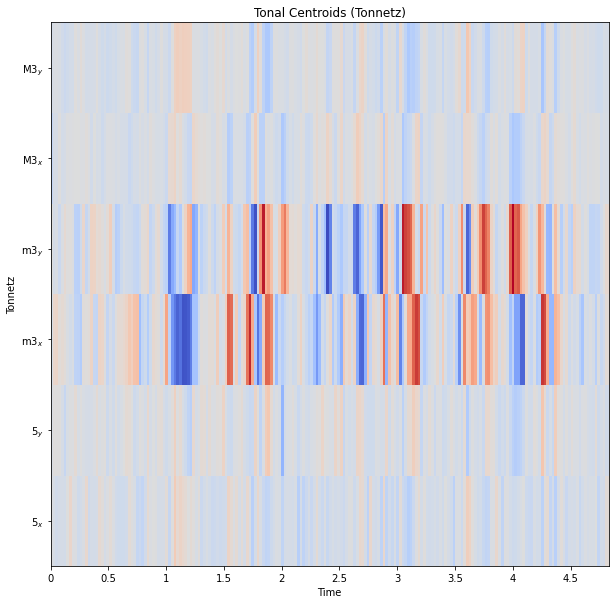

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))


img = librosa.display.specshow(data, y_axis='tonnetz', x_axis='time', ax=ax)

ax.set(title='Tonal Centroids (Tonnetz)')
ax.label_outer()

07: Spectral Contrast

In [ ]:
sample_rate = 16000
def spectral_contrast_feature(audio):
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate, n_fft=2048)
 
    return spectral_contrast   # it returns a  np.array with size (1,'n') where n is the number of audio frames.

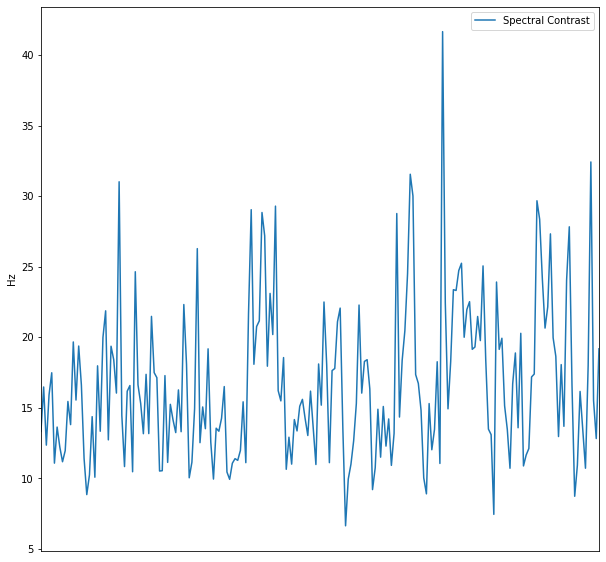

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

times = librosa.times_like(data)

ax.plot(times, data[0], label='Spectral Contrast')

ax.set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])

ax.legend()

ax.label_outer()

08: Poly Feature

In [ ]:
sample_rate = 16000
def poly_feature(audio):
    poly_features = librosa.feature.poly_features(y=audio, sr=sample_rate, n_fft=2048)
 
    return poly_features   # it returns a np.array with size (2,'n') where n is the number of audio frames.

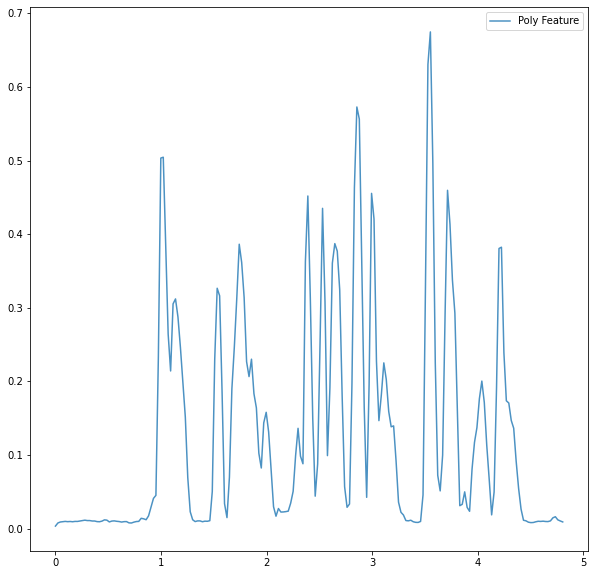

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

times = librosa.times_like(data)

ax.plot(times, data[1].T, alpha=0.8, label='Poly Feature')
ax.legend()
ax.label_outer()

09: roll-off frequency

In [ ]:
sample_rate = 16000
def spectral_rolloff_feature(audio):
    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sample_rate,  roll_percent=0.95)
 
    return spectral_rolloff   # it returns a np.array with size (1,'n') where n is the number of audio frames.

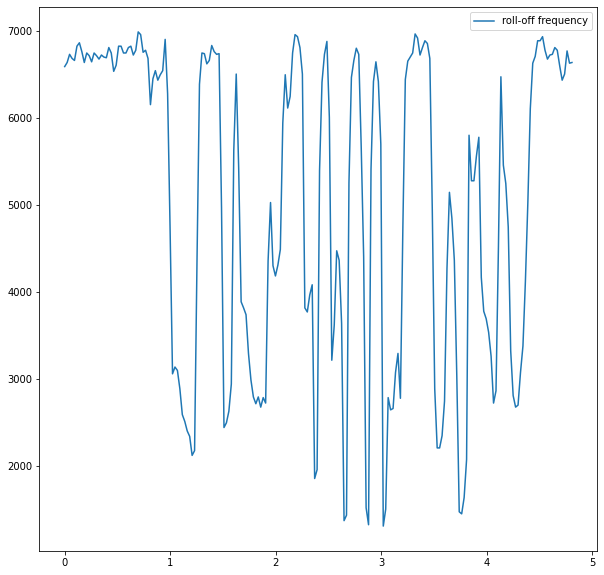

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

times = librosa.times_like(data)

ax.plot(times, data[0],  label='roll-off frequency')

ax.legend()
ax.label_outer()

10: Chroma_stft

In [ ]:
sample_rate = 16000
def chroma_stft_feature(audio):
    chroma_stft = librosa.feature.chroma_stft(y=audio, sr=sample_rate, n_fft=2048)
 
    return chroma_stft   # it returns a np.array with size (12,'n') where n is the number of audio frames.

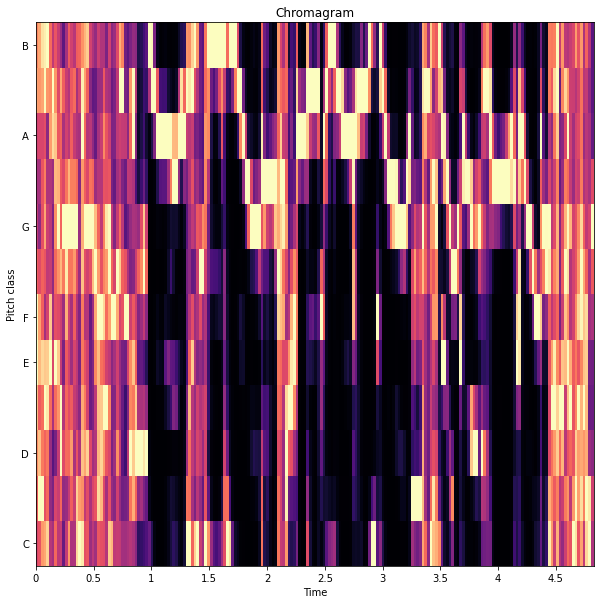

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

img = librosa.display.specshow(data, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='Chromagram')
ax.label_outer()

## 11: Zero Crossing Rate

In [ ]:
def zero_crossing_rate_features(audio):
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio)
 
    return zero_crossing_rate 

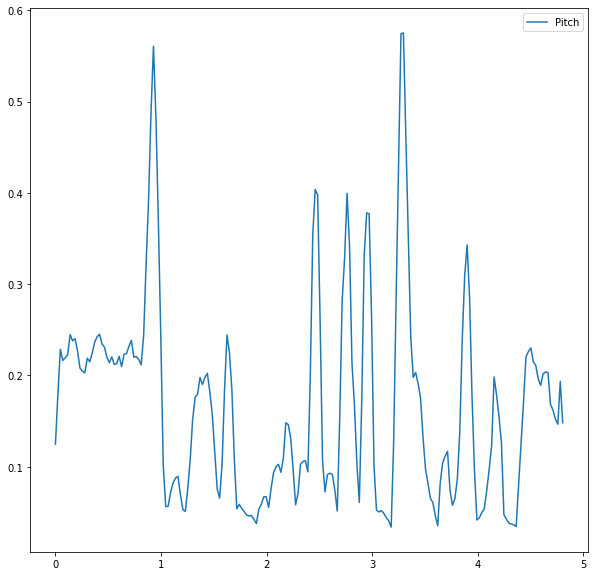

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

times = librosa.times_like(data)

ax.plot(times, data[0],  label='Pitch')

ax.legend()
ax.label_outer()

## 12: LPCC

In [ ]:
def lpcc_feature(audio):
  # compute lpccs
  lifter = 0
  normalize = True
  lpccs = lpcc(sig=audio, fs=16000, num_ceps=13, lifter=lifter, normalize=normalize) 
  return lpccs 

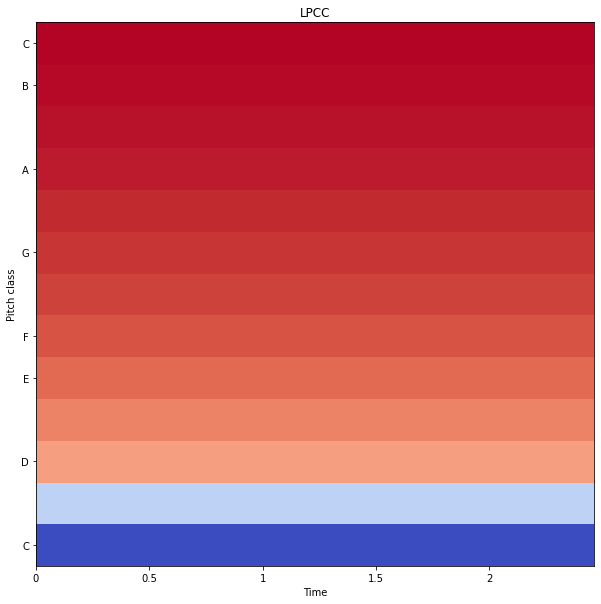

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

img = librosa.display.specshow(data.T, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='LPCC')
ax.label_outer()

## 13: Rasta PLP

In [ ]:
def RPLP_feature(audio):
    num_ceps = 13
    # compute features
    rplps = rplp(audio, 16000, num_ceps)
    return rplps

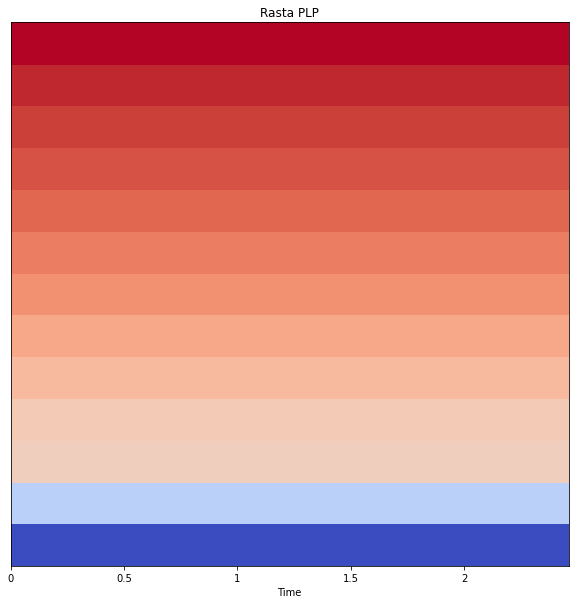

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

img = librosa.display.specshow(data.T, x_axis='time', ax=ax)
ax.set(title='Rasta PLP')
ax.label_outer()

#14: Pitch

In [ ]:
def pitch_feature(audio):
  pitches, magnitudes = librosa.core.piptrack(audio, sr=16000, fmin=75, fmax=1600)
  return pitches[:200,:]

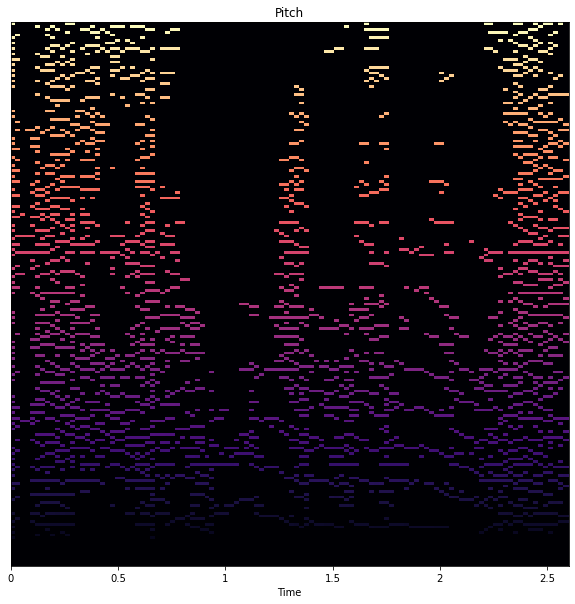

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

img = librosa.display.specshow(data, x_axis='time', ax=ax)
ax.set(title='Pitch')
ax.label_outer()

## Co Realtion

In [ ]:
def mfcc_feature(audio, sample_rate):
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
 
    return mfcc   # it returns a np.array with size (40,'n') where n is the number of audio frames.

def RMS_feature(audio):
    rms = librosa.feature.rms(y=audio)
 
    return rms   # it returns a np.array with size (1,'n') where n is the number of audio frames.

def CEN_feature(audio, sample_rate):
    cen = librosa.feature.chroma_cens(y=audio, sr=sample_rate)
 
 
    return cen   # it returns a np.array with size (12,'n') where n is the number of audio frames.

def melspectrogram_feature(audio, sample_rate):
    melspectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_fft=2048)
 
    return melspectrogram   # it returns a np.array with size (128,'n') where n is the number of audio frames.

def spectral_centroid_feature(audio, sample_rate):
    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sample_rate, n_fft=2048)
 
    return spectral_centroid   # it returns a np.array with size (1,'n') where n is the number of audio frames.

def tonnetz_feature(audio, sample_rate):
  
    y = librosa.effects.harmonic(audio)
    tonnetz = librosa.feature.tonnetz(y=y, sr=sample_rate)
 
    return tonnetz   # it returns a np.array with size (6,'n') where n is the number of audio frames.

def spectral_contrast_feature(audio, sample_rate):
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate, n_fft=2048)
 
    return spectral_contrast   # it returns a  np.array with size (7,'n') where n is the number of audio frames.
  
def poly_feature(audio, sample_rate):
    poly_features = librosa.feature.poly_features(y=audio, sr=sample_rate, n_fft=2048)
 
    return poly_features   # it returns a np.array with size (2,'n') where n is the number of audio frames.

def spectral_rolloff_feature(audio, sample_rate):
    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sample_rate,  roll_percent=0.95)
 
    return spectral_rolloff   # it returns a np.array with size (1,'n') where n is the number of audio frames.

def chroma_stft_feature(audio, sample_rate):
    chroma_stft = librosa.feature.chroma_stft(y=audio, sr=sample_rate, n_fft=2048)
 
    return chroma_stft   # it returns a np.array with size (12,'n') where n is the number of audio frames.

def zero_crossing_rate_features(audio):
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio)
 
    return zero_crossing_rate   # it returns a np.array with size (1,'n') where n is the number of audio frames.

def lpcc_feature(audio, sample_rate):
  # compute lpccs
  lifter = 0
  normalize = True
  lpccs = lpcc(sig=audio, fs=sample_rate, num_ceps=13, lifter=lifter, normalize=normalize) 
  return lpccs   # it returns a np.array with size ('n',13) where n is the number of audio frames.

def RPLP_feature(audio, sample_rate):
    num_ceps = 13
    # compute features
    rplps = rplp(audio, sample_rate, num_ceps)
    return rplps  # it returns a np.array with size ('n',13) where n is the number of audio frames.

def pitch_feature(audio, sample_rate):
  pitches, magnitudes = librosa.core.piptrack(audio, sr=16000, fmin=75, fmax=1600)
  return pitches[:200,:] # it returns a np.array with size (200,'n') where n is the number of audio frames.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# setting the path where all file's folder are
root = "gdrive/MyDrive/word_data/kaggle_original_data/train/audio/"

Featured_data = pd.DataFrame(columns=['MFCC', 'Root-mean-square','CENS','Mel-scaled-spectrogram','Spectral-Centroid','tonnetz',
                                      'Spectral-Contrast','Poly','roll-off-frequency','Chroma_stft','ZCR','pitch','LPCC','RPLP','class'])              


i = 0
sample_rate = 16000 
no_of_samples = 5
labels = ['bed', 'cat', 'down', 'left', 'no', 'right', 'seven', 'stop', 'yes', 'up']

# Loading the features in the dataframe
for label in labels:
  
  print(label)
  folders = os.path.join(root,label)
  items = os.listdir(folders)

  for item in items[:no_of_samples]:

    path = os.path.join(folders,item)


    #Convert .wave into array
    samples, sample_rate=librosa.load(path ,sr=sample_rate)

    #Extract Feautures
    MFCC = mfcc_feature(samples , sample_rate)
    RMS = RMS_feature(samples)
    CENS = CEN_feature(samples , sample_rate)
    MSS = melspectrogram_feature(samples , sample_rate)
    s_centroid = spectral_centroid_feature(samples , sample_rate)
    tonnetz = tonnetz_feature(samples , sample_rate)
    s_contrast = spectral_contrast_feature(samples , sample_rate)
    poly = poly_feature(samples , sample_rate)
    ROF = spectral_rolloff_feature(samples , sample_rate)
    CS = chroma_stft_feature(samples , sample_rate) 
    ZCR = zero_crossing_rate_features(samples) 
    pitch = pitch_feature(samples , sample_rate)
    LPCC = lpcc_feature(samples , sample_rate)
    RPLP = RPLP_feature(samples , sample_rate)

    MFCC = MFCC.flatten()
    RMS = RMS.flatten()
    CENS = CENS.flatten()
    MSS = MSS.flatten()
    s_centroid = s_centroid.flatten()
    tonnetz = tonnetz.flatten()
    s_contrast = s_contrast.flatten()
    poly = poly.flatten()
    ROF = ROF.flatten()
    CS = CS.flatten()
    ZCR = ZCR.flatten()
    pitch = pitch.flatten()
    LPCC = LPCC.flatten()
    RPLP = RPLP.flatten()
    
    MFCC,RMS, CENS, MSS, s_centroid, tonnetz , s_contrast, poly, ROF, CS, ZCR, pitch, LPCC, RPLP =  pd.Series(MFCC) , pd.Series(RMS), pd.Series(CENS), pd.Series(MSS), pd.Series(s_centroid), pd.Series(tonnetz) , pd.Series(s_contrast) ,pd.Series(poly), pd.Series(ROF), pd.Series(CS), pd.Series(ZCR), pd.Series(pitch), pd.Series(LPCC), pd.Series(RPLP)
    samples=  pd.Series(samples) 

    Featured_data.loc[i] = [ MFCC.corr(samples) ,RMS.corr(samples) ,CENS.corr(samples), MSS.corr(samples), s_centroid.corr(samples), tonnetz.corr(samples), s_contrast.corr(samples), poly.corr(samples), ROF.corr(samples), CS.corr(samples),ZCR.corr(samples), pitch.corr(samples), LPCC.corr(samples), RPLP.corr(samples),  label]

    i += 1

bed
cat
down
left
no
right
seven
stop
yes
up


In [ ]:
le = LabelEncoder()
Featured_data['class'] = le.fit_transform(Featured_data['class'].tolist())
features =  Featured_data.fillna(0) 
Featured_data.head()

,MFCC,Root-mean-square,CENS,Mel-scaled-spectrogram,Spectral-Centroid,tonnetz,Spectral-Contrast,Poly,roll-off-frequency,Chroma_stft,ZCR,pitch,LPCC,RPLP,class
0,-0.145167,0.294789,-0.148942,0.049498,-0.412745,-0.071880,0.253480,-0.401821,-0.329301,-0.071563,0.042525,-0.034008,0.010577,0.007929,0
1,0.126271,-0.679752,0.042766,0.002591,0.501960,0.121624,0.215774,0.161114,0.060577,0.025373,0.399797,-0.004485,-0.032835,-0.032214,0
2,NaN,NaN,NaN,0.001335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011814,NaN,NaN,0
3,0.010978,-0.067406,0.044079,0.020819,0.006460,-0.056832,0.065299,-0.055497,0.040107,0.028057,-0.014629,-0.014363,-0.006135,-0.007243,0
4,0.050722,0.357088,-0.045932,0.004560,-0.725815,0.042812,-0.124158,0.382540,-0.686434,-0.029714,-0.176620,-0.029667,-0.015144,-0.023804,0


In [ ]:
cor_matrix = Featured_data.corr()
cor_matrix.head()

,MFCC,Root-mean-square,CENS,Mel-scaled-spectrogram,Spectral-Centroid,tonnetz,Spectral-Contrast,Poly,roll-off-frequency,Chroma_stft,ZCR,pitch,LPCC,RPLP,class
MFCC,1.000000,-0.351900,0.086183,-0.299287,0.099340,-0.127994,-0.333305,0.556118,0.239742,0.012312,-0.122703,0.057971,0.077663,0.096784,0.139776
Root-mean-square,-0.351900,1.000000,-0.065015,0.076881,-0.275356,-0.038822,0.279232,-0.153750,-0.696176,0.204314,0.322065,-0.082099,-0.020040,-0.044303,0.117322
CENS,0.086183,-0.065015,1.000000,0.228346,0.142184,-0.315883,0.192541,-0.243084,0.082345,0.587115,0.046473,0.319661,-0.009044,-0.014245,0.110705
Mel-scaled-spectrogram,-0.299287,0.076881,0.228346,1.000000,0.104261,-0.074698,0.003866,-0.137206,0.056786,0.304417,0.120406,0.058385,0.132440,0.138672,-0.219794
Spectral-Centroid,0.099340,-0.275356,0.142184,0.104261,1.000000,-0.058920,-0.252266,0.099544,0.729177,0.098026,0.546129,0.095909,-0.076069,-0.043735,0.067029


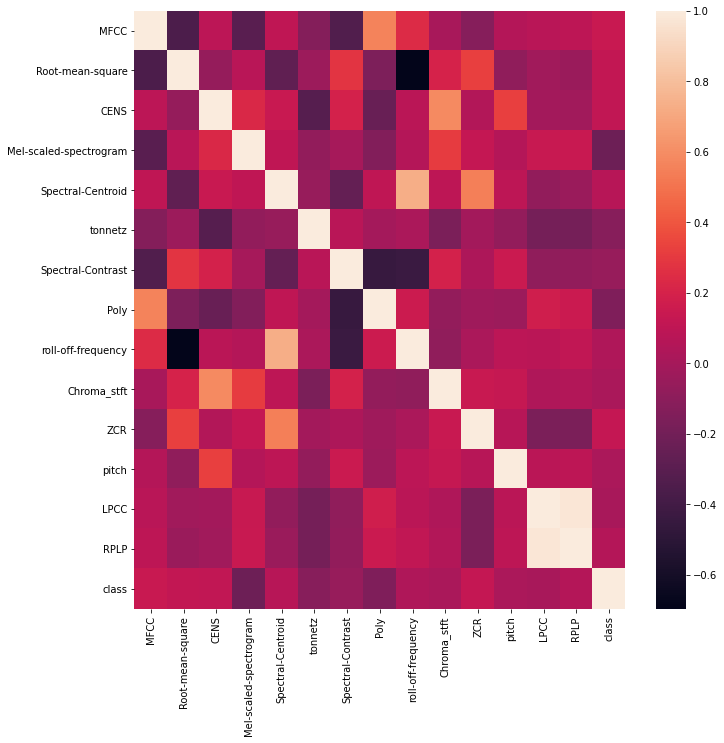

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(11,11))    
ax = sns.heatmap(cor_matrix)

In [ ]:
#Correlation with output variable
cor_target = abs(cor_matrix['class'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.12]
relevant_features

MFCC                      0.139776
Mel-scaled-spectrogram    0.219794
Poly                      0.146756
ZCR                       0.120788
class                     1.000000
Name: class, dtype: float64

In [ ]:
# path = "sample_data/sample-000003.mp3"
# sig,fs=librosa.load(path ,sr=16000)

# data = pitch_feature(sig)

In [ ]:
# data.shape

(200, 208)

In [ ]:
# data = data[:500,:]